---
# **Lab Report 02**
## **Name   : Muhammad Ehtisham Saleem**
## **Reg No : B22F1242AI108**
## **Lab : Artificial Neural Network**
## **Submitted To : Mam Ammara Irfan**
## **Course Instructor : Dr Arshad Iqbal**
---

---



# **Introduction:**
> **In this lab task, we develop an Artificial Neural Network (ANN) model using the Heart Disease dataset. The project begins with selecting and preprocessing the data, which involves cleaning the dataset, handling missing values, and removing outliers to ensure high data quality. We then construct and train an ANN model, incorporating key activation functions such as ReLU and Sigmoid—ReLU is applied in the hidden layers to introduce non-linearity, while Sigmoid is used in the output layer to facilitate binary classification. Finally, we visualize the model's performance through accuracy and loss plots to gain further insights into the predictions.**

## **Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## **Explanation**
* **Data Handling:** Uses numpy and pandas for efficient numerical operations and dataset manipulation.
* **Neural Network Construction:** Utilizes Sequential, Dense, and Dropout from TensorFlow/Keras to build and structure the ANN, with Adam as the optimizer.
* **Model Evaluation:** Incorporates confusion_matrix and classification_report from scikit-learn to assess the performance of the trained model.
* **Data Preprocessing**: Employs train_test_split to divide data into training and testing sets and StandardScaler to standardize features for balanced model training.







## **Dataset Loading and Exploration**
### **Dataset Source**
The dataset used in this lab task is the Heart Disease Dataset, obtained from Kaggle.
 >link : https://www.kaggle.com/datasets/winson13/heart-disease-dataset

## **Loading the Dataset:**

In [ ]:
diseases=pd.read_csv("Dataset Heart Disease.csv")
diseases.head()

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,4,54,1,3,150,195.0,0,0,122,0,0.0,1,0


## **Explanation**
* Uses pd.read_csv("Dataset Heart Disease.csv") to load the Heart Disease dataset into a DataFrame named diseases.

## **Data information:**

In [ ]:
rows,columns=diseases.shape
print("the number of samples:",rows)
print("the number of columns:",columns)

the number of samples: 1048
the number of columns: 13


In [ ]:
diseases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1048 non-null   int64  
 1   age                  1048 non-null   int64  
 2   sex                  1048 non-null   int64  
 3   chest pain type      1048 non-null   int64  
 4   resting bps          1048 non-null   int64  
 5   cholesterol          1048 non-null   float64
 6   fasting blood sugar  1048 non-null   int64  
 7   resting ecg          1048 non-null   int64  
 8   max heart rate       1048 non-null   int64  
 9   exercise angina      1048 non-null   int64  
 10  oldpeak              1048 non-null   float64
 11  ST slope             1048 non-null   int64  
 12  target               1048 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 106.6 KB


## **Explanation**
* **Checking Dataset Dimensions:** The line rows, columns = diseases.shape retrieves the number of samples (rows) and features (columns), which are then printed to confirm the dataset's size.
* **Inspecting Dataset Information:** The diseases.info() method provides a summary of the dataset, including data types and non-null counts for each column, helping to assess data quality and identify potential issues such as missing values.

# **Handling Missing and Duplicate Values**

In [ ]:
diseases.isnull().sum()

,0
Unnamed: 0,0
age,0
sex,0
chest pain type,0
resting bps,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0


* **Checking Missing Values:** The diseases.isnull().sum() function calculates the total number of missing values in each column. This helps identify whether any data cleaning is required.

In [ ]:
diseases.duplicated().sum()

0

* **Checking Duplicate Records**: The diseases.duplicated().sum() function counts the number of duplicate rows in the dataset. Removing duplicates ensures the model is trained on unique and meaningful data.

## **Columns name:**

In [ ]:
diseases.columns.tolist()

['Unnamed: 0',
 'age',
 'sex',
 'chest pain type',
 'resting bps',
 'cholesterol',
 'fasting blood sugar',
 'resting ecg',
 'max heart rate',
 'exercise angina',
 'oldpeak',
 'ST slope',
 'target']

# **Statical Information of the Data:**

In [ ]:
diseases.describe()

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,390.841603,53.325382,0.734733,2.817748,132.613550,245.172710,0.162214,0.606870,142.918893,0.368321,0.942366,1.532443,0.496183
std,307.916633,9.397822,0.441686,1.118649,17.367605,57.101359,0.368823,0.763313,24.427115,0.482579,1.100429,0.611023,0.500224
min,0.000000,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000
25%,130.750000,46.000000,0.000000,2.000000,120.000000,208.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000
50%,262.000000,54.000000,1.000000,3.000000,130.000000,239.000000,0.000000,0.000000,144.000000,0.000000,0.600000,2.000000,0.000000
75%,657.250000,60.000000,1.000000,4.000000,140.000000,275.000000,0.000000,1.000000,162.000000,1.000000,1.600000,2.000000,1.000000
max,1189.000000,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


# **Drop the Unneeded Column:**

In [ ]:
diseases.drop('Unnamed: 0',axis=1,inplace=True)
diseases

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,54,1,3,150,195.0,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1043,68,0,3,120,211.0,0,0,115,0,1.5,1,1
1044,44,0,3,108,141.0,0,1,175,0,0.6,1,1
1045,52,1,1,128,255.0,0,1,161,1,0.0,2,0
1046,59,1,4,160,273.0,0,0,125,0,0.0,2,0


## **Correlation Table**

                          age       sex  chest pain type  resting bps  \
age                  1.000000  0.021173         0.061909     0.271258   
sex                  0.021173  1.000000         0.100095     0.052696   
chest pain type      0.061909  0.100095         1.000000     0.065543   
resting bps          0.271258  0.052696         0.065543     1.000000   
cholesterol          0.095197 -0.082446        -0.003127     0.062966   
fasting blood sugar  0.198129  0.088910         0.056569     0.158696   
resting ecg          0.147666 -0.005598         0.099932     0.012090   
max heart rate      -0.390202 -0.133276        -0.219295    -0.121259   
exercise angina      0.196292  0.209263         0.206091     0.113910   
oldpeak              0.264781  0.144855         0.111937     0.184049   
ST slope             0.145192  0.095844         0.295466     0.065710   
target               0.166090  0.113366         0.364758     0.083493   

                     cholesterol  fasting blood su

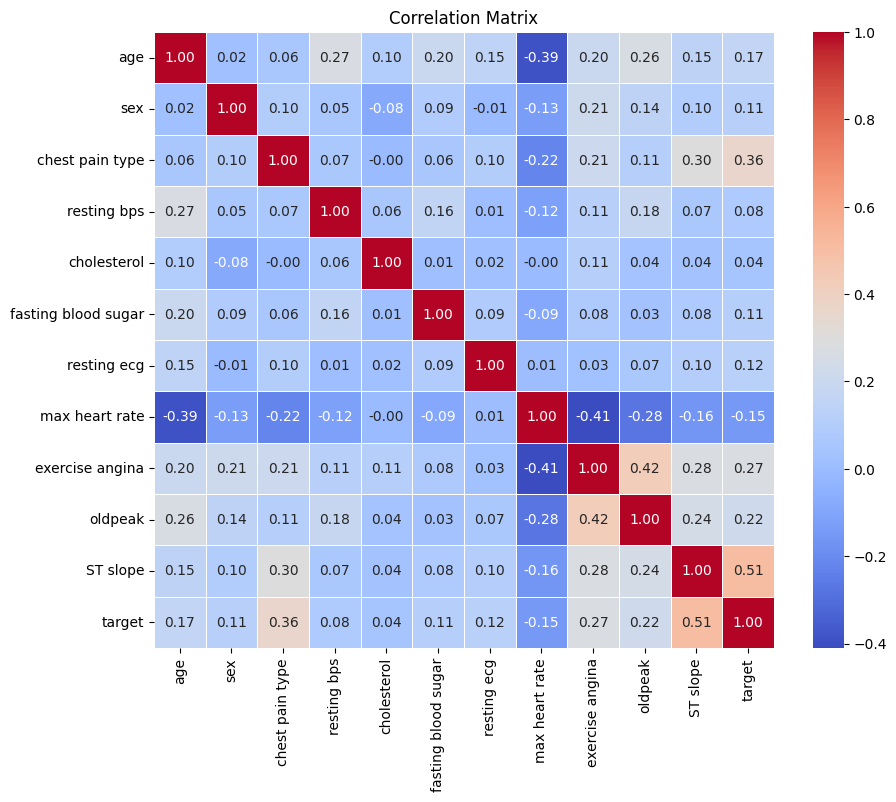

In [ ]:
# Calculate the correlation matrix
correlation_matrix = diseases.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### **Explanation**
* Correlation matrix: This table displays the correlation coefficients between all pairs of features in the dataset. A correlation value close to 1 or -1 indicates a strong relationship, while a value close to 0 suggests little to no linear relationship.

## **Exploratory Data Analysis (EDA) and Outlier Removal**


### **Age Distribution**

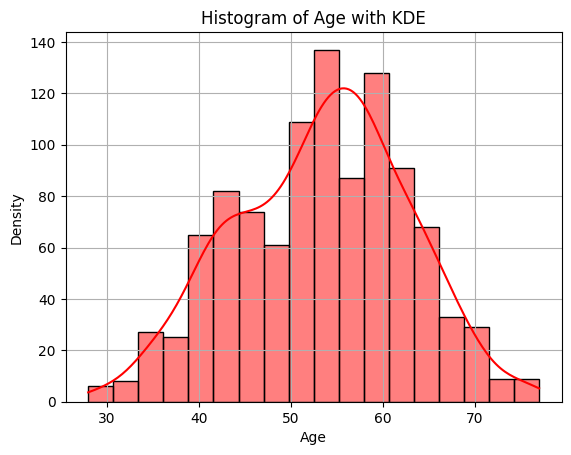

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=diseases['age'], kde=True, color='red')
plt.title('Histogram of Age with KDE')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()

### **Explanation**
* **Histogram with KDE:** Uses sns.histplot() to visualize the age distribution, with kde=True adding a smooth density curve for better insight into data spread.
* **Plot Customization:** Titles, labels, and grid lines are added for clarity, and the plot is displayed using plt.show().

### **Boxplot for Age Distribution**

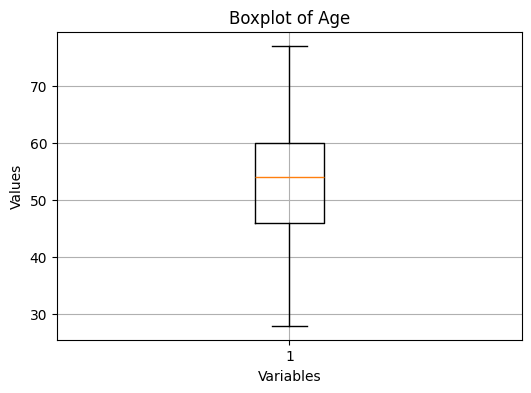

In [ ]:
# Creating a boxplot using Matplotlib
plt.figure(figsize=(6, 4))  # Adjust size as needed
plt.boxplot(diseases['age'])
plt.title('Boxplot of Age')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(True)
plt.show()

### **Chart for Gender Distribution**

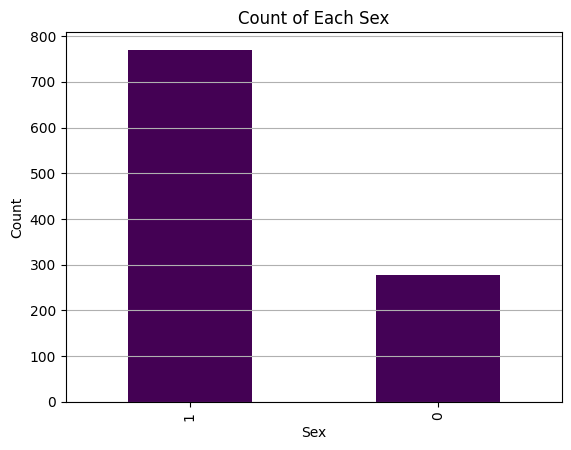

In [ ]:
colors = plt.cm.viridis(range(len(diseases['sex'].unique())))

# Plotting bar chart for 'sex' column
diseases['sex'].value_counts().plot(kind='bar', color=colors)
plt.title('Count of Each Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

### **Explanation**
* **Color Mapping**: Uses plt.cm.viridis() to assign unique colors based on the number of distinct values in the sex column.
* **Plotting the Bar Chart**: The value_counts().plot(kind='bar') function creates a bar chart to visualize the count of each sex category.

### **Chart for Chest Pain Type Distribution**

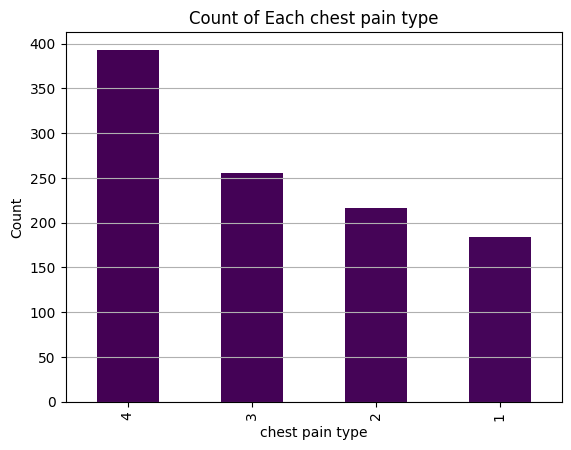

In [ ]:
colors = plt.cm.viridis(range(len(diseases['chest pain type'].unique())))

# Plotting bar chart for 'sex' column
diseases['chest pain type'].value_counts().plot(kind='bar', color=colors)
plt.title('Count of Each chest pain type')
plt.xlabel('chest pain type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

## **Explanation**
* Visualizes the distribution of different chest pain types to understand frequency variations.
* Identifies data imbalance to check if certain categories dominate the dataset.
* Helps in feature analysis by providing insights into how chest pain types relate to heart disease.

### **Histogram of Resting Blood Pressure**

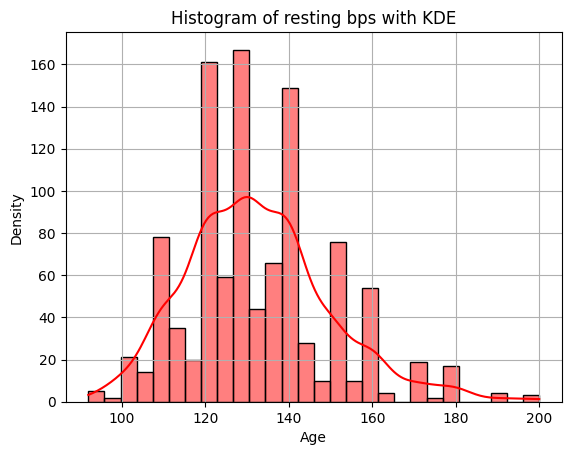

In [ ]:
sns.histplot(data=diseases['resting bps'], kde=True, color='red')
plt.title('Histogram of resting bps with KDE')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()

### **Explanation**
* Shows the distribution of resting blood pressure values in the dataset.
* Identifies trends and variations using a histogram with a KDE (Kernel Density Estimation) curve.
* Helps detect outliers by observing extreme values in the distribution.

### **Boxplot of Resting Blood Pressure (BPS)**

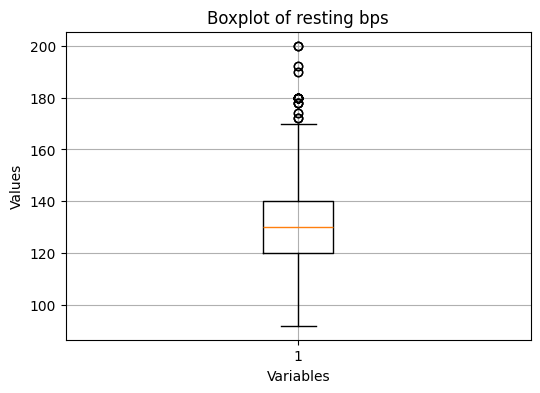

In [ ]:
# Creating a boxplot using Matplotlib
plt.figure(figsize=(6, 4))  # Adjust size as needed
plt.boxplot(diseases['resting bps'])
plt.title('Boxplot of resting bps')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(True)
plt.show()

### **Explanation**
* Visualizes data distribution to understand the spread of resting blood pressure values.
* Detects outliers by identifying values outside the whiskers of the boxplot.
* Helps in preprocessing by highlighting extreme values that may affect model performance.

### **Removing Outliers from Resting Blood Pressure**

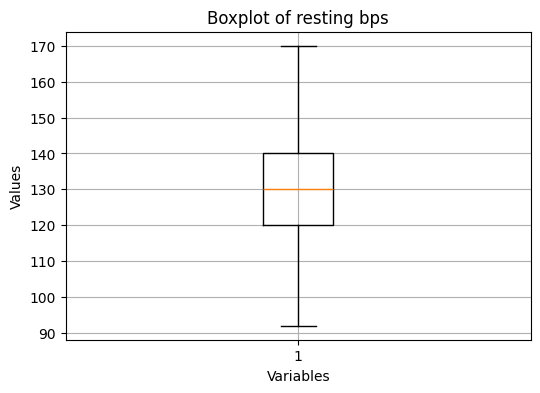

In [ ]:
Q1 = diseases['resting bps'].quantile(0.25)
Q3 = diseases['resting bps'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
diseases = diseases[(diseases['resting bps'] >= lower_bound) & (diseases['resting bps'] <= upper_bound)]
plt.figure(figsize=(6, 4))
plt.boxplot(diseases['resting bps'])
plt.title('Boxplot of resting bps')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(True)
plt.show()

### **Explanation**
* Uses IQR method to detect and remove outliers beyond 1.5 times the interquartile range.
* Ensures data consistency by keeping only values within the calculated lower and upper bounds.
* Improves model accuracy by preventing extreme values from negatively affecting training.

### **Histogram of Cholesterol**

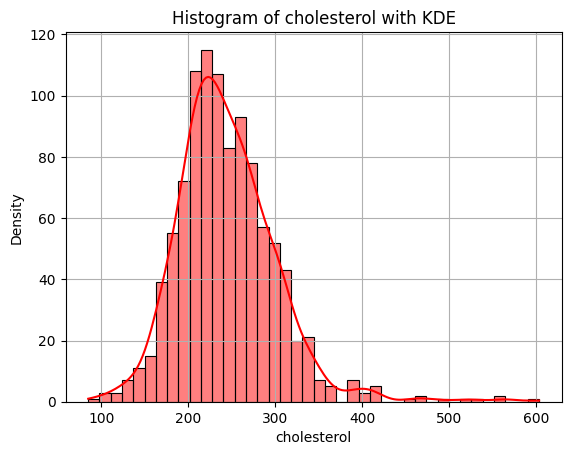

In [ ]:
sns.histplot(data=diseases['cholesterol'], kde=True, color='red')
plt.title('Histogram of cholesterol with KDE')
plt.xlabel('cholesterol')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Explanation
* Shows the distribution of cholesterol levels in the dataset.
* Identifies trends and variations using a histogram with a KDE (Kernel Density Estimation) curve.
* Helps detect outliers by highlighting extreme cholesterol values.

### **Boxplot of Cholesterol**

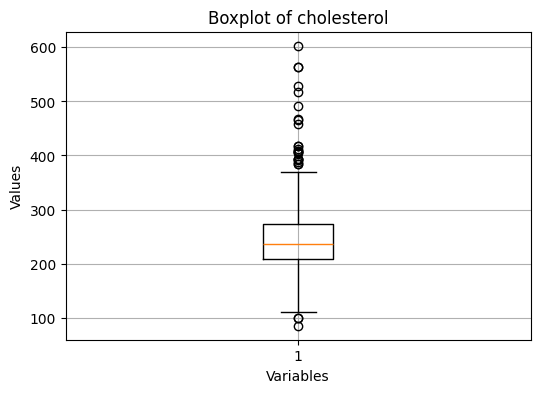

In [ ]:
# Creating a boxplot using Matplotlib
plt.figure(figsize=(6, 4))  # Adjust size as needed
plt.boxplot(diseases['cholesterol'])
plt.title('Boxplot of cholesterol')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(True)
plt.show()

## **Explanation**
* Visualizes data distribution to understand the spread of cholesterol levels.
* Detects outliers by identifying extreme values beyond the whiskers.
* Supports preprocessing by highlighting values that may affect model performance.

### **Removing Outliers from Cholesterol**

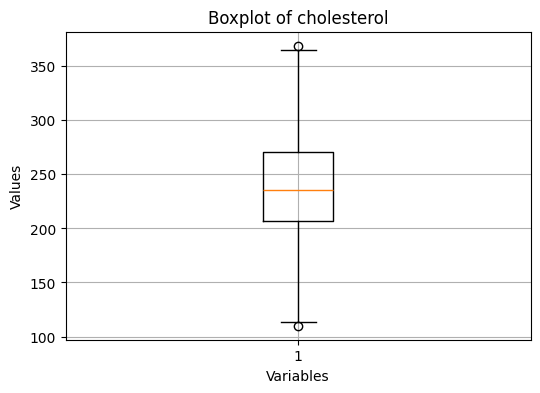

In [ ]:
Q1 = diseases['cholesterol'].quantile(0.25)
Q3 = diseases['cholesterol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
diseases = diseases[(diseases['cholesterol'] >= lower_bound) & (diseases['cholesterol'] <= upper_bound)]
plt.figure(figsize=(6, 4))
plt.boxplot(diseases['cholesterol'])
plt.title('Boxplot of cholesterol')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(True)
plt.show()

### **Explanation**
* Uses IQR method to detect and remove outliers beyond 1.5 times the interquartile range.
* Retains relevant data by keeping only values within the lower and upper bounds.
* Enhances model accuracy by preventing extreme cholesterol values from affecting training.

### **Bar Chart for Fasting Blood Sugar**


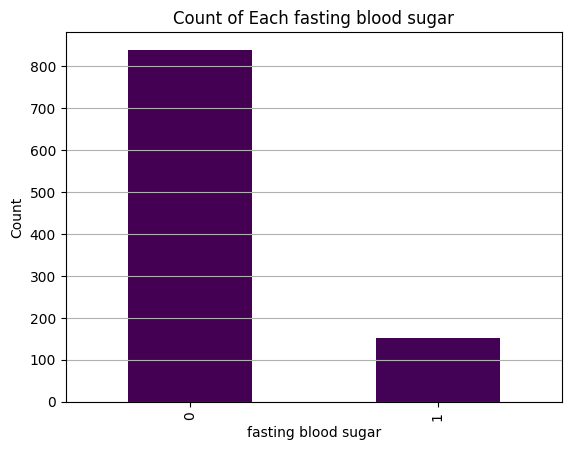

In [ ]:
colors = plt.cm.viridis(range(len(diseases['fasting blood sugar'].unique())))

# Plotting bar chart for 'sex' column
diseases['fasting blood sugar'].value_counts().plot(kind='bar', color=colors)
plt.title('Count of Each fasting blood sugar')
plt.xlabel('fasting blood sugar')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

### **Explanation**
* Visualizes the distribution of fasting blood sugar levels in the dataset.
* Identifies data imbalance to check if certain categories dominate.
* Helps in feature analysis by understanding how fasting blood sugar relates to heart disease.

### **Bar Chart for Resting ECG**

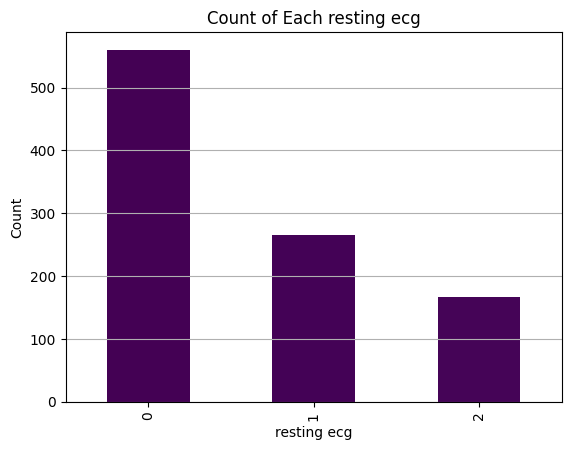

In [ ]:

colors = plt.cm.viridis(range(len(diseases['resting ecg'].unique())))

# Plotting bar chart for 'sex' column
diseases['resting ecg'].value_counts().plot(kind='bar', color=colors)
plt.title('Count of Each resting ecg')
plt.xlabel('resting ecg')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

### **Explanation**
* Displays the distribution of different resting ECG categories in the dataset.
* Identifies data imbalance by showing if certain ECG types are more frequent.
* Aids in feature analysis to understand how resting ECG variations relate to heart disease.

### **Bar Chart for Exercise Angina**

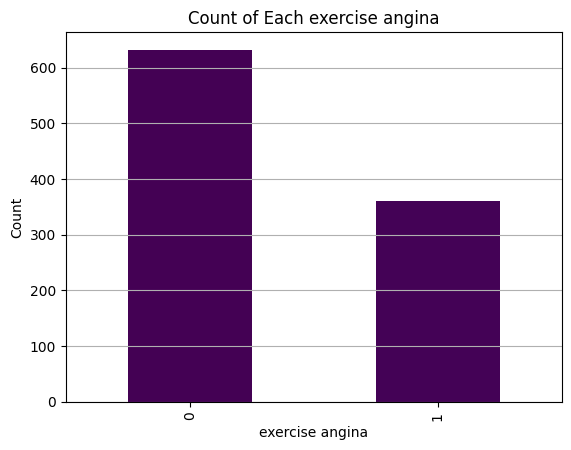

In [ ]:
colors = plt.cm.viridis(range(len(diseases['exercise angina'].unique())))
# Plotting bar chart for 'sex' column
diseases['exercise angina'].value_counts().plot(kind='bar', color=colors)
plt.title('Count of Each exercise angina')
plt.xlabel('exercise angina')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

### **Explanation**
* Visualizes the distribution of exercise-induced angina cases in the dataset.
* Identifies data imbalance by showing if a specific category is more frequent.
* Helps in feature analysis to understand the impact of exercise angina on heart disease.

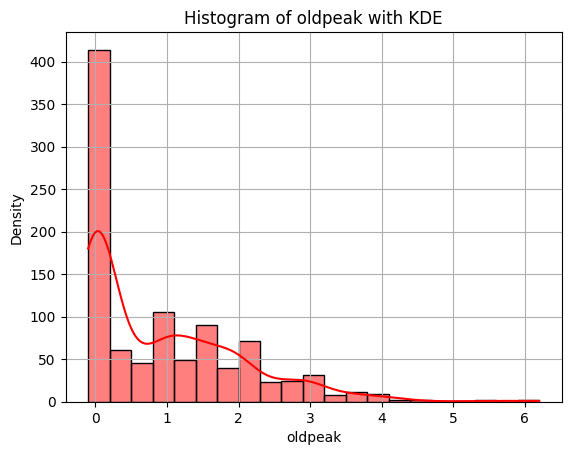

In [ ]:
sns.histplot(data=diseases['oldpeak'], kde=True, color='red')
plt.title('Histogram of oldpeak with KDE')
plt.xlabel('oldpeak')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [ ]:
diseases.describe()

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,53.164315,0.745968,2.806452,131.076613,239.931452,0.154234,0.603831,143.065524,0.362903,0.925706,1.528226,0.493952
std,9.455308,0.435535,1.116268,15.401855,46.881599,0.361355,0.759272,24.450464,0.481080,1.085672,0.607064,0.500216
min,28.000000,0.000000,1.000000,92.000000,110.000000,0.000000,0.000000,71.000000,0.000000,-0.100000,0.000000,0.000000
25%,46.000000,0.000000,2.000000,120.000000,207.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,236.000000,0.000000,0.000000,144.000000,0.000000,0.600000,2.000000,0.000000
75%,60.000000,1.000000,4.000000,140.000000,271.000000,0.000000,1.000000,162.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,170.000000,369.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
diseases.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 1047
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  992 non-null    int64  
 1   sex                  992 non-null    int64  
 2   chest pain type      992 non-null    int64  
 3   resting bps          992 non-null    int64  
 4   cholesterol          992 non-null    float64
 5   fasting blood sugar  992 non-null    int64  
 6   resting ecg          992 non-null    int64  
 7   max heart rate       992 non-null    int64  
 8   exercise angina      992 non-null    int64  
 9   oldpeak              992 non-null    float64
 10  ST slope             992 non-null    int64  
 11  target               992 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 100.8 KB


## **Data Preprocessing**
### **Splitting Features and Target**


In [ ]:
y=diseases['target']
x=diseases.drop('target',axis=1)


## **Explanation**
* Separates the target variable (y) which represents the presence of heart disease.
* Stores the features (x) by removing the target column from the dataset.
* Prepares the data for model training by distinguishing inputs and outputs.

In [ ]:
x

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289.0,0,0,172,0,0.0,1
1,49,0,3,160,180.0,0,0,156,0,1.0,2
2,37,1,2,130,283.0,0,1,98,0,0.0,1
3,48,0,4,138,214.0,0,0,108,1,1.5,2
4,54,1,3,150,195.0,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1043,68,0,3,120,211.0,0,0,115,0,1.5,1
1044,44,0,3,108,141.0,0,1,175,0,0.6,1
1045,52,1,1,128,255.0,0,1,161,1,0.0,2
1046,59,1,4,160,273.0,0,0,125,0,0.0,2


## **Standardizing the Data**

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(x)


## **Explanation**
* Applies StandardScaler() to transform the feature values to a standard normal distribution.
* Improves model performance by ensuring all numerical features have a mean of 0 and standard deviation of 1.
* Prepares the data for efficient learning by eliminating scale differences between features.

## **Splitting the Dataset into Training and Testing Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Explanation**
* Splits the dataset into 80% for training and 20% for testing to evaluate the model's performance.
* Ensures reproducibility by using random_state=42 for consistent results across different runs.
* Prepares the data by separating features (X) and target variable (y) into training and testing subsets.

# **Applying the ANN Model**


## **Defining the ANN Model Architecture**


In [ ]:
model = Sequential([
    Dense(256, input_shape=(11,), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Explanation**
* Sequential model: Builds the neural network layer by layer.
* Dense layers: Each layer is fully connected with ReLU activation and L2 regularization to prevent overfitting.
* Dropout: Regularization technique applied to randomly drop 20% of neurons in
* Final layer: A single output neuron with a Sigmoid activation for binary classification (heart disease or no disease).

### **compute the accuracy and test the model:**
## **Compiling the ANN Model**


In [ ]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

## **Explanation**
* Optimizer: Uses Adam, an adaptive optimization algorithm that adjusts learning rates during training.
* Loss function: Specifies binary_crossentropy for binary classification tasks, comparing predicted and actual values.


## **Training the ANN Model**


In [ ]:
# Train the model and store history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)
# Extract accuracy values
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)



Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8385 - loss: 0.4963 - val_accuracy: 0.7375 - val_loss: 0.5671
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8083 - loss: 0.5163 - val_accuracy: 0.7875 - val_loss: 0.5677
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8254 - loss: 0.5155 - val_accuracy: 0.7500 - val_loss: 0.5744
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8666 - loss: 0.4698 - val_accuracy: 0.8000 - val_loss: 0.5645
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8202 - loss: 0.5095 - val_accuracy: 0.7875 - val_loss: 0.5574
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8195 - loss: 0.5154 - val_accuracy: 0.7875 - val_loss: 0.5681
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8246 - loss: 0.5020 - val_accuracy: 0.7625 - val_loss: 0.5751
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8340 - loss: 0.5034 - val_accuracy: 0.

## **Explanation**
* **Training process:** The model is trained on X_train and y_train for 100 epochs with a batch size of 32.
* **Validation:** 10% of the training data is used for validation during each epoch to track performance.
* **Accuracy tracking:** The training and validation accuracy values are extracted from the history object to monitor model performance.

## **Plotting Training and Validation Accuracy**

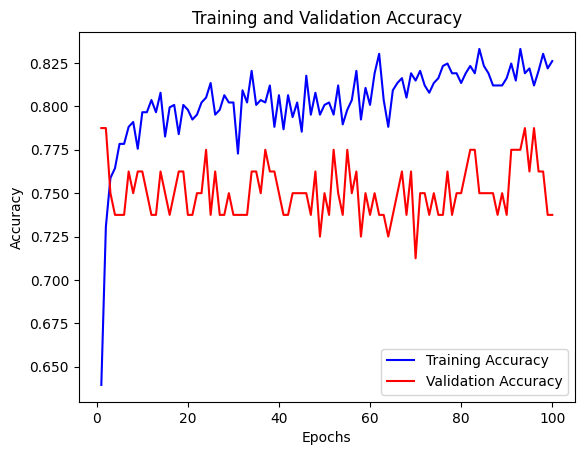

In [ ]:
# Extract accuracy values
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Plot accuracy values
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Explanation**
* Extracts accuracy: Training and validation accuracy are retrieved from the history object for each epoch.
* Plots accuracy: Training and validation accuracy are plotted against epochs to visualize model performance over time.
* Graph details: The plot includes labels for the x-axis (epochs) and y-axis (accuracy), and uses different colors to distinguish training and validation accuracy.

## **Evaluating the Model**


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy:{accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8236 - loss: 0.5665
Test Loss: 0.5740889310836792, Test Accuracy:0.80402010679245


## **Explanation**
* **Model evaluation:** The model's performance is evaluated on the test set (X_test, y_test) by calculating both the loss and accuracy.
* **Results:** The test loss and accuracy values are printed to provide insights into how well the model generalizes to unseen data.

## **Compute the Confusion Matrix:**

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)
y_pred_flat = np.ravel(y_pred)
y_test_flat = np.ravel(y_test)
conf_matrix = confusion_matrix(y_test_flat, y_pred_flat)

print("Confusion Matrix:")
print(conf_matrix)




7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Confusion Matrix:
[[83 12]
 [27 77]]


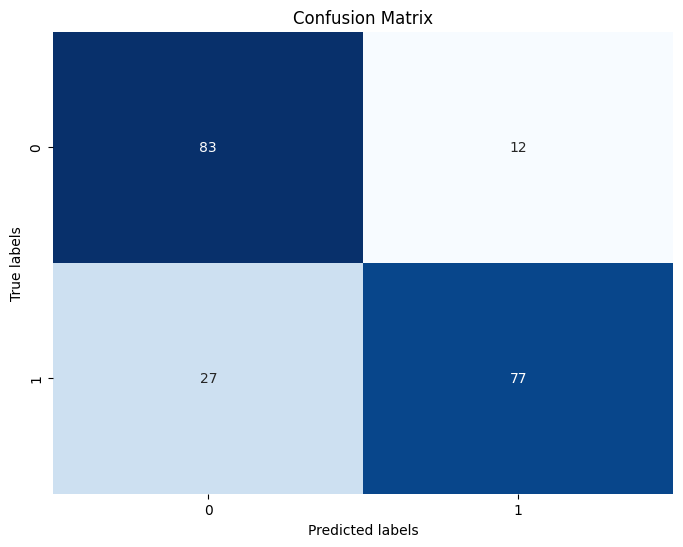

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## **Classification Report**

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test_flat, y_pred_flat))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81        95
           1       0.87      0.74      0.80       104

    accuracy                           0.80       199
   macro avg       0.81      0.81      0.80       199
weighted avg       0.81      0.80      0.80       199



## **Explanation**
* **Classification report:** The classification_report function from scikit-learn provides detailed metrics, including precision, recall, F1-score, and support for each class.
* **Model evaluation:** The report is printed to evaluate the model's classification performance on the test set, offering insights into how well the model distinguishes between the target classes.



---


---

